# image to 3D

## import image

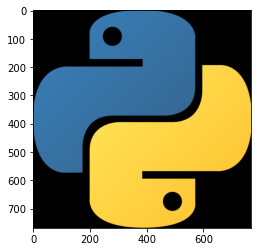

In [1]:
#import image from folder
from PIL import Image
import os, os.path
import matplotlib.pyplot as plt

image_list = []
path = os.getcwd()
valid_im = [".jpg",".png"]
for i in os.listdir(path):
    ext = os.path.splitext(i)[1]
    if ext.lower() not in valid_im :
        continue
    image_list.append(Image.open(os.path.join(path,i)))

im=image_list[0]

plt.imshow(im)

In [ ]:
#or
#from PIL import Image
from PIL import Image
import matplotlib.pyplot as plt
im = Image.open("python.jpg")
plt.imshow(im)

In [ ]:
#change the format of an image file using PIL
formatIm = im.format
print(formatIm)
if formatIm == 'PNG':
    im = im.convert('RGB')
    im.save('image.jpg')
    im = Image.open("image.jpg")    

## convert to grayscale

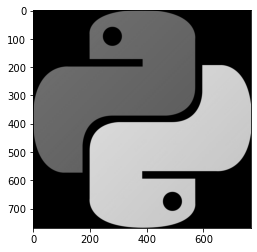

In [2]:
im= im.convert('LA')
plt.imshow(im)

## convert image to numpy array

In [3]:
import numpy as np

#2d array
image_sequence = im.getdata()
im_arr = np. array(image_sequence)
print(im_arr.shape)
#3d array
im_arr = np.array(im)
print(im_arr.shape)

# image array for 1 channel or use .convert('L')
im_arr = im_arr[:,:,0]
print(im_arr.shape)

(589824, 2)
(768, 768, 2)
(768, 768)


## using matplotlib

In [4]:
import matplotlib.pyplot as plt

width,height = im.size
x, y = np.meshgrid(range(width), range(height)) #Return coordinate matrices from coordinate vectors.

C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


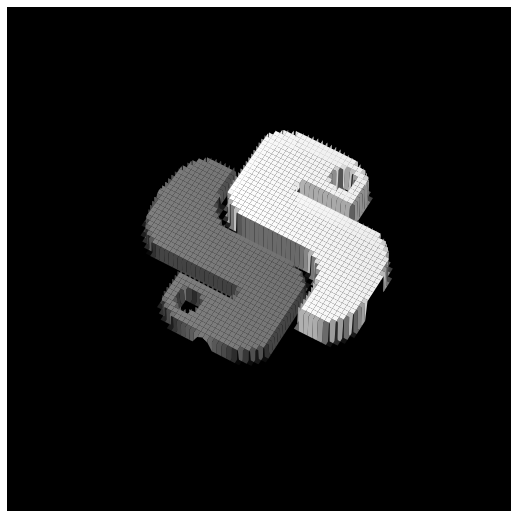

<ipython-input-5-7d58eec17c09>:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig("3Dplot.png", dpi=100)


<Figure size 504x504 with 0 Axes>

In [5]:
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams["figure.figsize"] = [7, 7]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = Axes3D(fig)
ax.elev= 60
ax.plot_surface(x, y, im_arr, cmap=plt.cm.gray) # add : linewidth=0, antialiased=False, rstride=1, cstride=1
ax.axis("off") # do not plot axes
plt.grid(False) # hide grid
ax.set_zlim(-width,height) #set limits to the z-axis
ax.set_facecolor([0,0,0]) # set ground color

fig = plt.gcf()
plt.show()
plt.draw()
fig.savefig("3Dplot.png", dpi=100)

(768, 768, 2)
(768, 768)


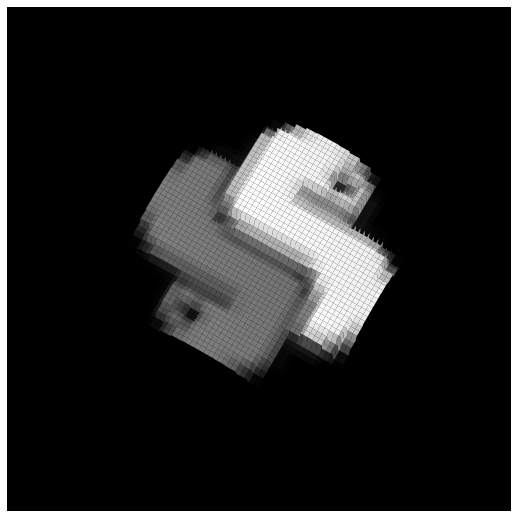

In [6]:
# pixelated/Voxel 3D image 
from scipy import ndimage
imgSmall = im.resize((20,20),resample=Image.BILINEAR)
# Scale back up using NEAREST to original size
result = imgSmall.resize(im.size,Image.NEAREST)
result.save('result.png')
px = Image.open("result.png")
imp_arr = np.array(px)
print(imp_arr.shape)

imp_arr = imp_arr[:,:,0]
print(im_arr.shape)

fig = plt.figure()
ax = Axes3D(fig)
ax.elev= 75
ax.plot_surface(x, y, imp_arr, cmap=plt.cm.gray) #, linewidth=0, antialiased=False, rstride=1, cstride=1
ax.axis("off") # do not plot axes
plt.grid(False)
ax.set_zlim(-width,height) #set limits to the z-axis
ax.set_facecolor([0,0,0]) # set ground color
plt.show()

# 3D .stl file

In [ ]:
from stl import mesh

faces=[]
for i in range(im_arr.shape[0]-1):
        for j in range(im_arr.shape[1]-1):
            v1 = np.array([x[i,j], y[i,j], im_arr[i,j]])
            v2 = np.array([x[i,j+1], y[i,j+1], im_arr[i,j+1]])
            v3 = np.array([x[i+1,j+1], y[i+1,j+1], im_arr[i+1,j+1]])
            face1 = np.array([v1,v2,v3])
            
            v1 = np.array([x[i+1,j+1], y[i+1,j+1], im_arr[i+1,j+1]])
            v2 = np.array([x[i+1,j], y[i+1,j], im_arr[i+1,j]])
            v3 = np.array([x[i,j], y[i,j], im_arr[i,j]])
            face2 = np.array([v1,v2,v3])
            
            # 1 face of a cube has 2 triangle shaped faces
            faces.append(face1)
            faces.append(face2)
            
print(f"number of faces: {len(faces)}")
vertices=np.zeros((width,height,3))
print(f"number of vertices: {len(vertices)}")


facesNp = np.array(faces)
# Create the mesh
surface = mesh.Mesh(np.zeros(facesNp.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        surface.vectors[i][j] = facesNp[i][j]

surface.save('3D.stl')  

In [ ]:
#Remesh the input mesh to remove degeneracies and improve triangle quality

im_mesh = mesh.Mesh.from_file('3D.stl')
# The mesh normals (calculated automatically)
im_mesh.normals
# The mesh vectors
im_mesh.v0, im_mesh.v1, im_mesh.v2
# Accessing individual points (concatenation of v0, v1 and v2 in triplets)
assert (im_mesh.points[0][0:3] == im_mesh.v0[0]).all()
assert (im_mesh.points[0][3:6] == im_mesh.v1[0]).all()
assert (im_mesh.points[0][6:9] == im_mesh.v2[0]).all()
assert (im_mesh.points[1][0:3] == im_mesh.v0[1]).all()

im_mesh.save('3Dim.stl')

In [ ]:
#visualize the mesh

import trimesh
mesh = trimesh.load_mesh('3D.STL')
mesh.vertices -= mesh.center_mass
mesh.split()
mesh.show()